___DAB 401 Financial Analytics___

___Group 2___

___Group Project: JP Morgan Stock___


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yf
from prophet import Prophet

In [2]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

In [3]:
df = yf.download("JPM",
                start = "2022-01-01",
                end = "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,159.860001,162.639999,159.509995,161.699997,154.391342,13120900
2022-01-04,164.309998,168.580002,164.229996,167.830002,160.244293,20195800
2022-01-05,167.820007,168.360001,163.729996,163.779999,157.314697,17539400
2022-01-06,166.910004,167.369995,163.869995,165.520004,158.986023,14047500
2022-01-07,165.669998,167.529999,165.059998,167.160004,160.561279,13913300


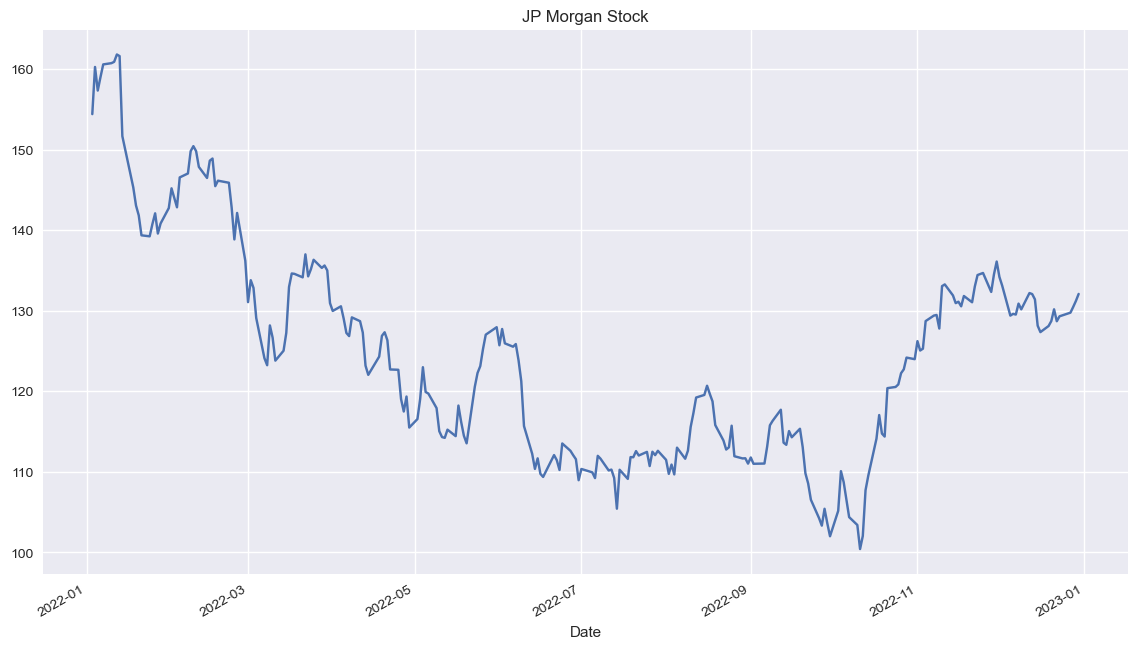

In [5]:
df["Adj Close"].plot(title="JP Morgan Stock");

## BOLLINGER BANDS

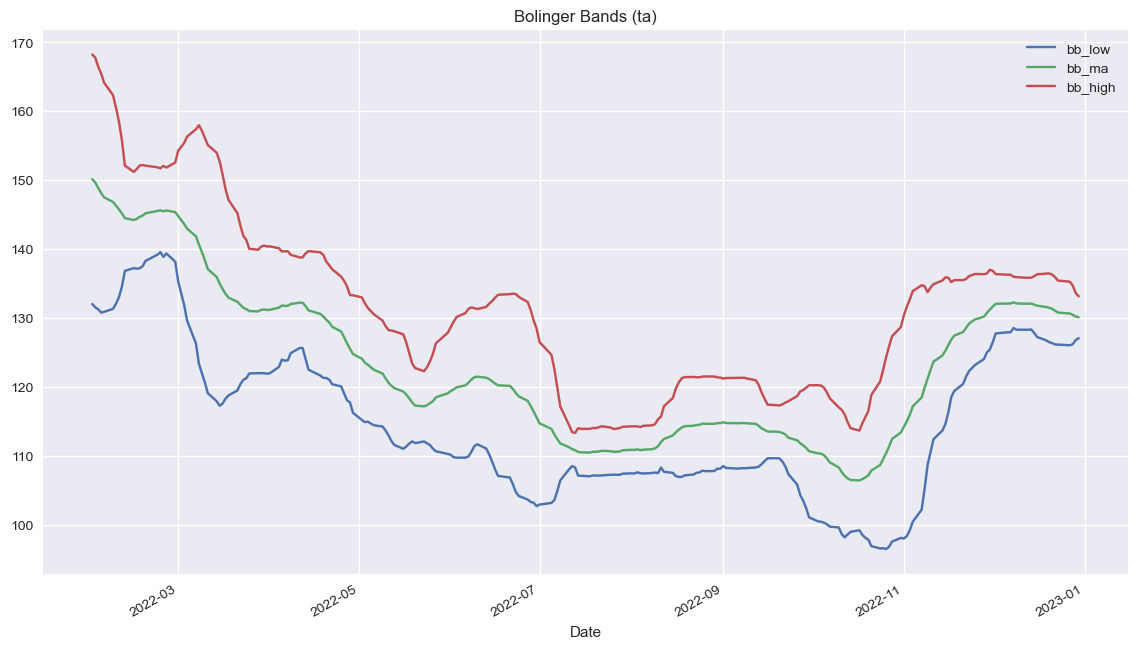

In [6]:
# instantiate the indicator
ta_bbands = ta.volatility.BollingerBands(close=df ["Adj Close"], window=20, window_dev=2)
# copy as we will be adding to it temporarily
ta_df = df.copy()
# add Bollinger Bands
ta_df["bb_ma"] = ta_bbands.bollinger_mavg()
ta_df["bb_high"] = ta_bbands. bollinger_hband()
ta_df["bb_low"] = ta_bbands.bollinger_lband()
ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bolinger Bands (ta)");

In [7]:
df.to_csv('JPM Bollinger Band.csv')

## Stock Signals: Simple Moving Average

In [8]:
myticker = 'JPM'
mydata = pd.DataFrame()
mydata[myticker]= yf.download(myticker, start = "2022-01-01", end = "2022-12-31")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2022-01-03,154.391357
2022-01-04,160.244293
2022-01-05,157.314697
2022-01-06,158.986008
2022-01-07,160.561264
2022-01-10,160.714966
2022-01-11,160.878250
2022-01-12,161.790741
2022-01-13,161.589020


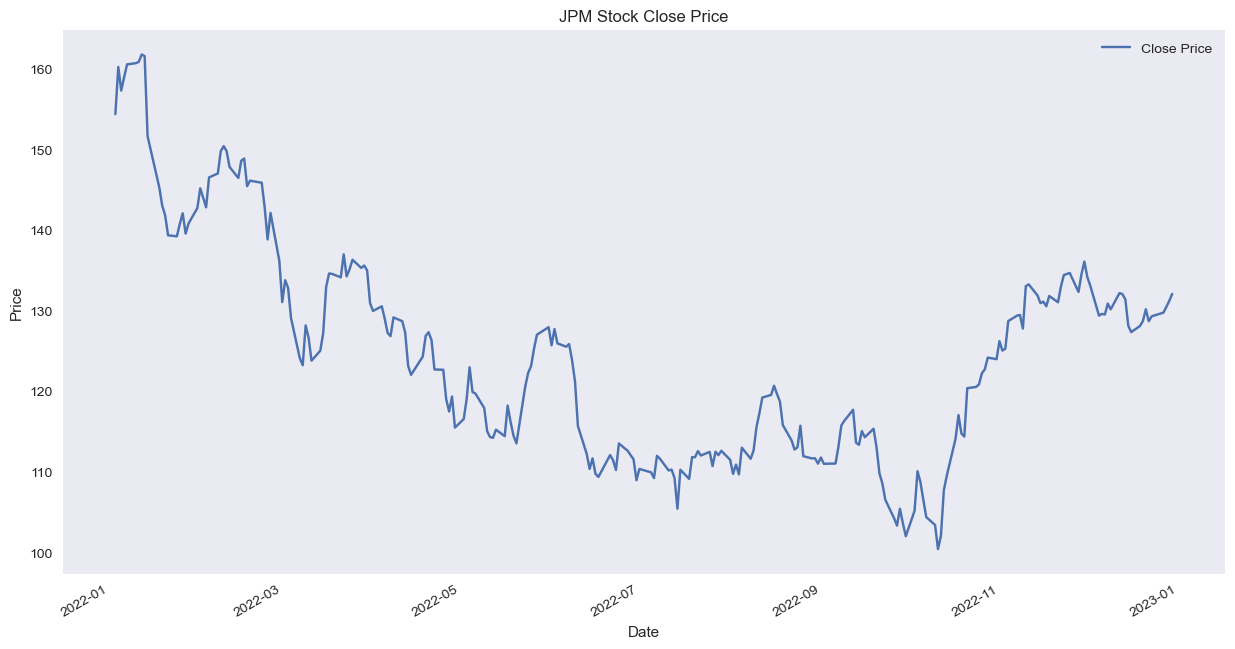

In [9]:
mydata.plot(figsize= (15,8))
plt.grid()
plt.ylabel("Price")
plt.title("JPM Stock Close Price")
plt.show()

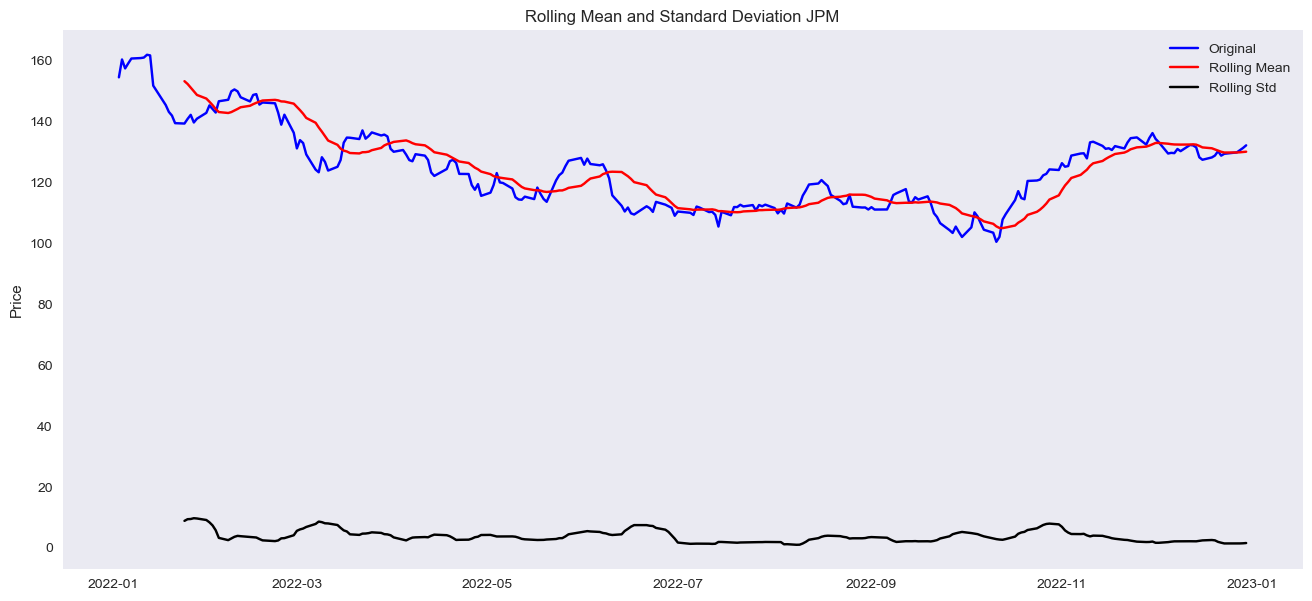

In [10]:
rolling_mean = mydata['Close Price'].rolling(15).mean()
rolling_std = mydata['Close Price'].rolling(15).std()

plt.figure(figsize = (16,7))
fig = plt.figure(1)

orig = plt.plot(mydata['Close Price'], color = 'blue', label='Original')
mean = plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
std = plt.plot(rolling_std, color = 'black', label='Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviation ' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [11]:
#Create 30 days moving average as Short-term MA
mydata['STMA30'] = mydata['Close Price'].rolling(window = 30, min_periods = 1).mean()

#Create 90 days moving average as Long-term MA
mydata['LTMA90'] = mydata['Close Price'].rolling(window = 90, min_periods = 1).mean()

#display first few rows
mydata.head()

,Close Price,STMA30,LTMA90
Date,,,
2022-01-03,154.391357,154.391357,154.391357
2022-01-04,160.244293,157.317825,157.317825
2022-01-05,157.314697,157.316783,157.316783
2022-01-06,158.986008,157.734089,157.734089
2022-01-07,160.561264,158.299524,158.299524


In [12]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['STMA30'] > mydata['LTMA90'], 1.0, 0.0)

In [13]:
mydata['Position'] = mydata['Signal'].diff()
mydata.head()

,Close Price,STMA30,LTMA90,Signal,Position
Date,,,,,
2022-01-03,154.391357,154.391357,154.391357,0.0,NaN
2022-01-04,160.244293,157.317825,157.317825,0.0,0.0
2022-01-05,157.314697,157.316783,157.316783,0.0,0.0
2022-01-06,158.986008,157.734089,157.734089,0.0,0.0
2022-01-07,160.561264,158.299524,158.299524,0.0,0.0


___The stock price of the company was relatively stable between January 3 to January 7, 2022, with a slight increase on January 4. The short-term moving average and long-term moving average values for each day were almost the same, indicating that the stock price did not deviate much from its averages during this period. However, this short-term snapshot alone may not be enough to provide a comprehensive understanding of the stock's performance. Further analysis is required to make informed investment decisions.___

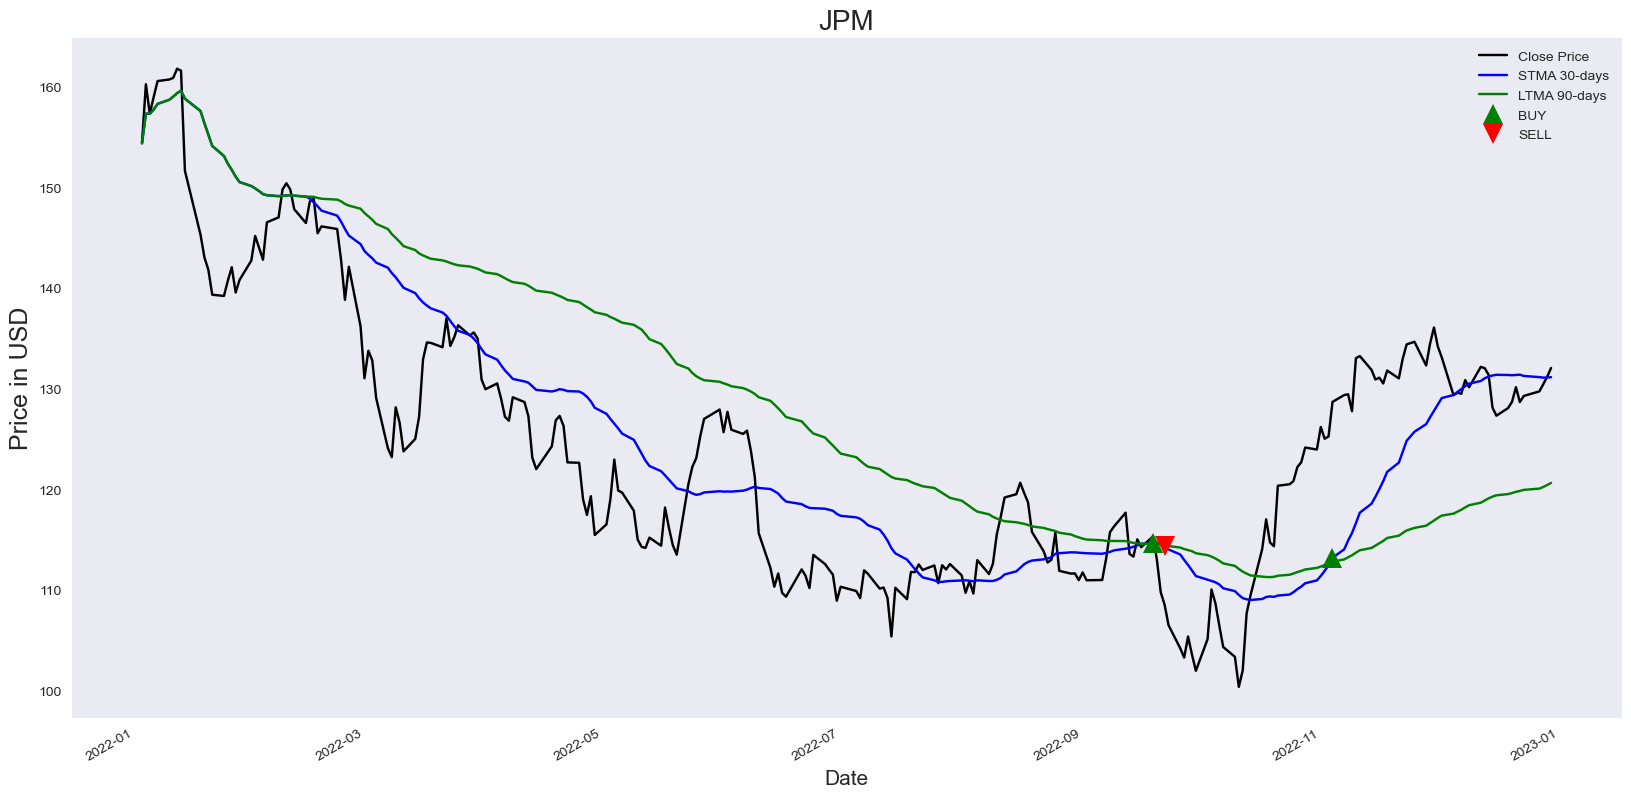

In [14]:
plt.figure(figsize = (20,10))

#plot close price, short-term and long-term moving averages
mydata['Close Price'].plot(color = 'k', label = 'Close Price')
mydata['STMA30'].plot(color = 'b', label = 'STMA 30-days')
mydata['LTMA90'].plot(color = 'g', label = 'LTMA 90-days')

#plot 'buy' signals
plt.plot(mydata[mydata['Position'] == 1].index,
         mydata['STMA30'][mydata['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'BUY')

#plot 'sell' signals
plt.plot(mydata[mydata['Position'] == -1].index,
         mydata['STMA30'][mydata['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'SELL')

plt.ylabel('Price in USD', fontsize= 18)
plt.xlabel('Date', fontsize= 15)
plt.title(myticker, fontsize= 20)
plt.legend()
plt.grid()
plt.show()

In [15]:
df_position = mydata[(mydata['Position']== 1) | (mydata['Position']== -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'BUY' if x == 1 else 'SELL')
print(tabulate(df_position, headers = 'keys', tablefmt= 'psql'))

+---------------------+---------------+----------+----------+----------+------------+
| Date                |   Close Price |   STMA30 |   LTMA90 |   Signal | Position   |
|---------------------+---------------+----------+----------+----------+------------|
| 2022-09-19 00:00:00 |       115.348 |  114.701 |  114.628 |        1 | BUY        |
| 2022-09-22 00:00:00 |       108.564 |  114.421 |  114.491 |        0 | SELL       |
| 2022-11-04 00:00:00 |       128.712 |  113.237 |  112.848 |        1 | BUY        |
+---------------------+---------------+----------+----------+----------+------------+


In [16]:
#close price, short-term and long-term moving averages
mydata['EMA30'] = mydata['Close Price'].ewm(span = 30, adjust = False).mean()
mydata['EMA90'] = mydata['Close Price'].ewm(span = 90, adjust = False).mean()

In [17]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['EMA30'] > mydata['EMA90'], 1.0, 0.0)

In [18]:
mydata['Position'] = mydata['Signal'].diff()

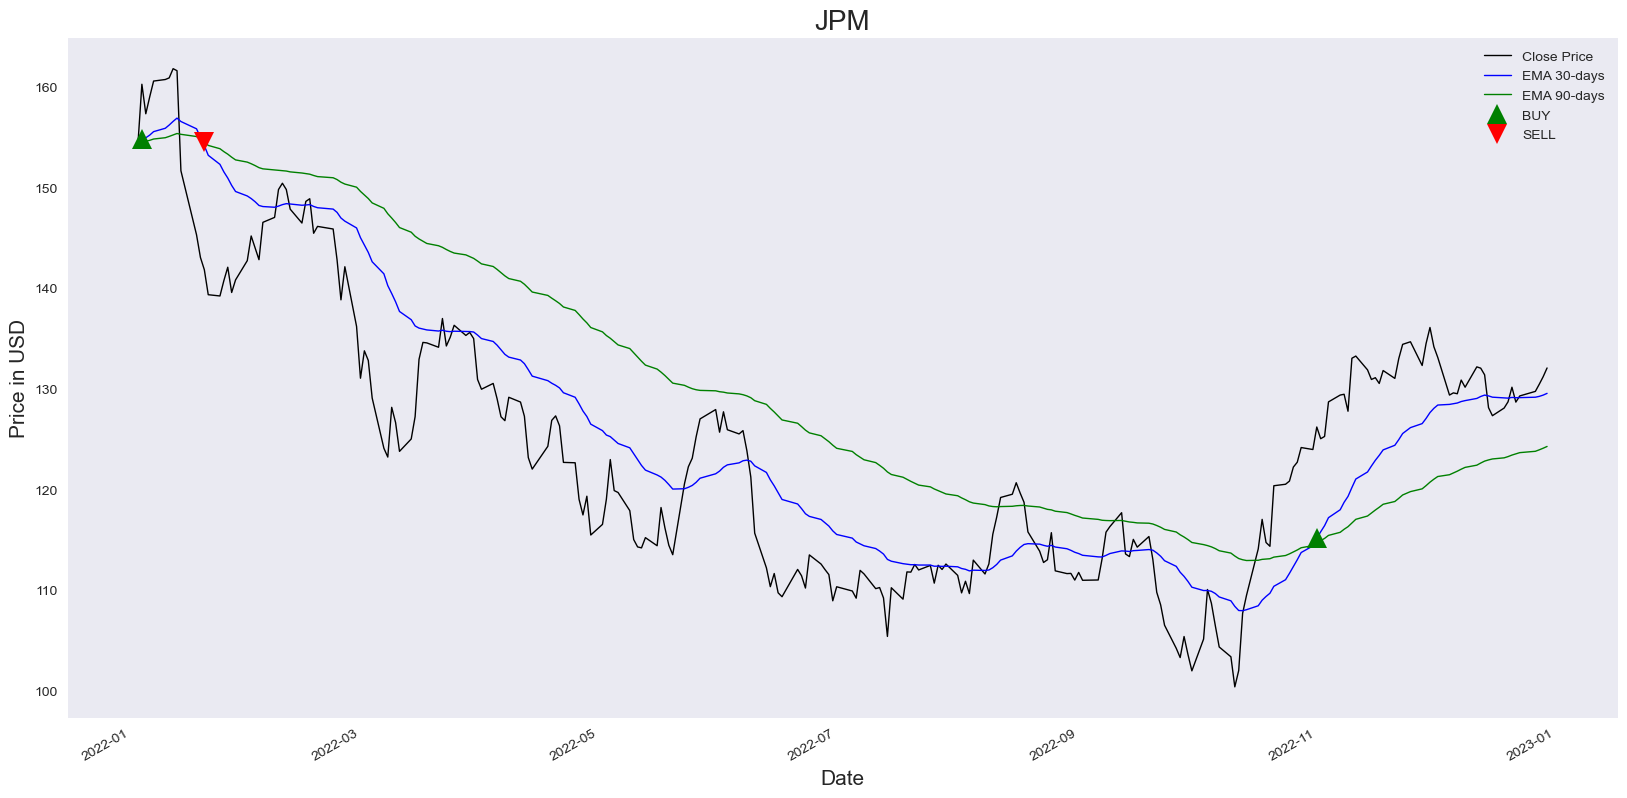

In [19]:
plt.figure(figsize = (20, 10))

#plot close price, short-term and long-term moving averages
mydata['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')
mydata['EMA30'].plot(color = 'b', lw = 1, label = 'EMA 30-days')
mydata['EMA90'].plot(color = 'g', lw = 1, label = 'EMA 90-days')

#plot 'buy' signals
plt.plot(mydata[mydata['Position'] == 1].index,
         mydata['EMA30'][mydata['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'BUY')

#plot 'sell' signals
plt.plot(mydata[mydata['Position'] == -1].index,
         mydata['EMA90'][mydata['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'SELL')

plt.ylabel('Price in USD', fontsize= 15)
plt.xlabel('Date', fontsize= 15)
plt.title(myticker, fontsize= 20)
plt.legend()
plt.grid()
plt.show()


In [22]:
mydata1_position = mydata[(mydata['Position']== 1) | (mydata['Position']== -1)]
mydata1_position['Position'] = mydata1_position['Position'].apply(lambda x: 'BUY' if x == 1 else 'SELL')
print(tabulate(mydata1_position, headers = 'keys', tablefmt= 'psql'))

+---------------------+---------------+----------+----------+----------+------------+---------+---------+
| Date                |   Close Price |   STMA30 |   LTMA90 |   Signal | Position   |   EMA30 |   EMA90 |
|---------------------+---------------+----------+----------+----------+------------+---------+---------|
| 2022-01-04 00:00:00 |       160.244 |  157.318 |  157.318 |        1 | BUY        | 154.769 | 154.52  |
| 2022-01-20 00:00:00 |       141.831 |  155.254 |  155.254 |        0 | SELL       | 154.147 | 154.507 |
| 2022-11-01 00:00:00 |       126.22  |  111.433 |  112.372 |        1 | BUY        | 115.18  | 114.707 |
+---------------------+---------------+----------+----------+----------+------------+---------+---------+


___The information provided is about a trading strategy that uses short-term and long-term moving averages to generate buy and sell signals for JPM stock. The strategy opened a buy position on September 19, 2022, but closed it on September 22, 2022, resulting in a loss. The strategy then opened another buy position on November 4, 2022. It's important to note that relying solely on technical indicators may not always be a reliable approach, and other factors should also be considered before making investment decisions.___

## Forecasting of JPM using Facebook Prophet

In [ ]:
myticker_1 = 'JPM'
df_1 = pd.DataFrame()
df_1[myticker_1]= yf.download(myticker_1, start = "2022-01-01", end = "2022-12-31")['Adj Close']
df_1.columns = {'Close Price'}
df_1.head(10)

In [ ]:
df_1 = df_1.reset_index()
df_1[['ds', 'y']]= df_1[['Date','Close Price']] 

In [ ]:
df_1

In [ ]:
model= Prophet()

In [ ]:
# drop the columns
prophet_df = df_1.drop(['Date', 'Close Price'], axis = 1)

In [ ]:
ax = prophet_df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Close Price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
model.fit(prophet_df)

In [ ]:
future = model.make_future_dataframe(periods = 365)

In [ ]:
predictions = model.predict(future)
model.plot(predictions)
plt.title("Prediction of JPM Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

___The forecast provides a prediction for the variable being forecasted (yhat) along with the lower and upper bounds of the forecast (yhat_lower and yhat_upper) for the dates ranging from December 26, 2023 to December 30, 2023.___

___It seems that the forecast is predicting an increase in the value of the variable being forecasted over the given time period. The lower and upper bounds can be used to estimate the level of uncertainty associated with the forecast.___

___Based on this data, the model predicts that JP Morgan's stock price have slight frequent changes in value throughout December 2023, with a predicted price___
- ___on December 26th, 236.85,___ 
- ___on December 27th, 237.16,___ 
- ___on December 28th, 237.00,___ 
- ___on December 29th, 237.39,___ 
- ___on December 30th, 237.14___ 

___However, it's important to note that stock prices can be highly volatile and subject to many external factors, so these predictions may not necessarily be accurate.___

In [ ]:
model.plot_components(predictions)
plt.show()

- ___Based on the forecasting results, it can be inferred that the stock price is expected to exhibit an upward trend over the course of December 2023.___
- ___Based on the analysis, the data suggests a trend of price increase during weekdays, while a decrease in price during weekends.___